In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# -*- coding: utf-8 -*-
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import SGD
import math

import matplotlib.pyplot as plt

In [3]:
# 이미지 데이터 경로 설정
train_path = r'/content/drive/MyDrive/졸프/trainingest'
valid_path = r'/content/drive/MyDrive/졸프/validationset'

In [4]:
# 이미지 크기 설정
img_width, img_height = 224, 224

# ImageDataGenrator을 활용한 Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.5, brightness_range=(0.8, 1.2), rotation_range=20)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_path, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')

Found 5000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


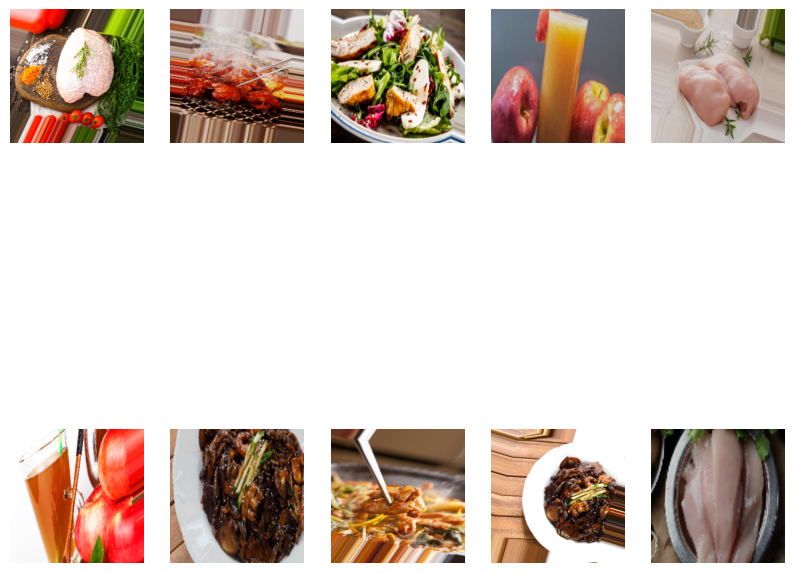

In [5]:
# Display 10 random images generated by ImageDataGenerator
images = []
for _ in range(10):
    batch = next(train_generator)
    images.extend(batch[0])
    
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [6]:
# VGG16 모델 로딩 및 학습 레이어 제거 ; dropout 0.5-> 0.3으로 조정
input_tensor = Input(shape=(img_width, img_height, 3))
vgg16_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
last_layer = vgg16_model.output
last_layer = Flatten()(last_layer)
last_layer = Dense(256, activation='relu')(last_layer)
last_layer = Dropout(0.3)(last_layer)
output_layer = Dense(train_generator.num_classes, activation='softmax')(last_layer)

model = Model(inputs=vgg16_model.input, outputs=output_layer)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# 미세 조정을 위한 학습 설정
for layer in model.layers[:15]:
    layer.trainable = False

sgd = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


<ipython-input-9-d9d27ce1dfce>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=9, validation_data=valid_generator, validation_steps=validation_steps)


Epoch 1/9
156/156 [==============================] - 1412s 9s/step - loss: 0.7500 - accuracy: 0.7079 - val_loss: 0.4144 - val_accuracy: 0.8357
Epoch 2/9
156/156 [==============================] - 486s 3s/step - loss: 0.2785 - accuracy: 0.8971 - val_loss: 0.4012 - val_accuracy: 0.8558
Epoch 3/9
156/156 [==============================] - 488s 3s/step - loss: 0.1988 - accuracy: 0.9295 - val_loss: 0.3111 - val_accuracy: 0.8891
Epoch 4/9
156/156 [==============================] - 486s 3s/step - loss: 0.1640 - accuracy: 0.9402 - val_loss: 0.3137 - val_accuracy: 0.8921
Epoch 5/9
156/156 [==============================] - 485s 3s/step - loss: 0.1360 - accuracy: 0.9477 - val_loss: 0.2850 - val_accuracy: 0.8982
Epoch 6/9
156/156 [==============================] - 484s 3s/step - loss: 0.1251 - accuracy: 0.9553 - val_loss: 0.2600 - val_accuracy: 0.9073
Epoch 7/9
156/156 [==============================] - 484s 3s/step - loss: 0.1109 - accuracy: 0.9581 - val_loss: 0.2771 - val_accuracy: 0.9032
Epoch

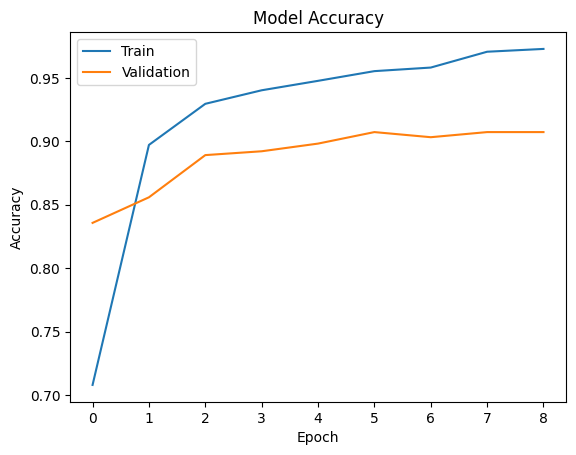

In [9]:
# 모델 학습 및 평가
steps_per_epoch = math.floor(train_generator.samples / train_generator.batch_size)
validation_steps = math.floor(valid_generator.samples / valid_generator.batch_size)

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=9, validation_data=valid_generator, validation_steps=validation_steps)

# 훈련 정확도와 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
 #현재 내가 작업하는 위치를 변경
%cd '/content/drive/MyDrive/졸프'

#테스트
with open('/content/drive/MyDrive/졸프/foo.txt', 'w') as f:
  f.write('Hello Google Drive!') 

# 모델 저장
model.save('food_classifier_vgg16.h5')

/content/drive/MyDrive/졸프
